<a href="https://colab.research.google.com/github/giyuntf2/1day1commit/blob/main/pytorch/torch_prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

# LOAD MNIST DATASET

In [ ]:
train_mnist_dataset = MnistDataset('/content/drive/MyDrive/Colab Notebooks/pytorch_prac/source2/mnist_train.csv')
test_mnist_dataset = MnistDataset('/content/drive/MyDrive/Colab Notebooks/pytorch_prac/source2/mnist_test.csv')

In [ ]:
class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass

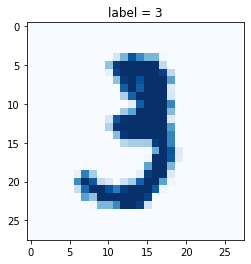

In [ ]:
#TEST
train_mnist_dataset.plot_image(10)

# FIRST TRY

In [66]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        self.trainer_count = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs) 
        loss = self.loss_function(outputs, targets) 

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        self.trainer_count += 1

        if (self.trainer_count % 10 == 0):
            self.progress.append(loss.item())
            
        if (self.trainer_count % 10000 == 0):
            print(f"counter = {self.trainer_count}")


In [67]:
%%time 
C = Classifier()

epochs = 4

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in train_mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass

training epoch 1 of 4
counter = 10000
counter = 20000
counter = 30000
counter = 40000
counter = 50000
counter = 60000
training epoch 2 of 4
counter = 70000
counter = 80000
counter = 90000
counter = 100000
counter = 110000
counter = 120000
training epoch 3 of 4
counter = 130000
counter = 140000
counter = 150000
counter = 160000
counter = 170000
counter = 180000
training epoch 4 of 4
counter = 190000
counter = 200000
counter = 210000
counter = 220000
counter = 230000
counter = 240000
CPU times: user 10min 22s, sys: 9.42 s, total: 10min 31s
Wall time: 5min 15s


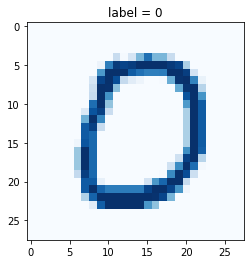

In [68]:
record = 10
test_image = test_mnist_dataset[record][1]
test_mnist_dataset.plot_image(10)

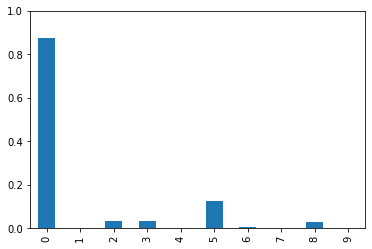

In [69]:
output = C.forward(test_image)

pd.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))
plt.show()

In [70]:
def get_acc(score=0, items=0):
    for label, image_data_tensor, target_tensor in test_mnist_dataset:
        answer = C.forward(image_data_tensor).detach().numpy()
        if (answer.argmax() == label):
            score += 1
            pass
        items += 1

    print(score, items, score/items)

get_acc()

8807 10000 0.8807


# SECOND TRY

In [65]:
class Classifier_LR(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),
            
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        
        self.loss_function = nn.BCELoss()

        self.optimiser = torch.optim.Adam(self.parameters())
        
        self.trainer_count = 0
        self.progress = []

        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        self.trainer_count += 1

        if (self.trainer_count % 10 == 0):
            self.progress.append(loss.item())
            pass
            
        if (self.trainer_count % 10000 == 0):
            print(f"counter = {self.trainer_count}")
            pass

In [57]:
%%time 
C_LR = Classifier_LR()

epochs = 4

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in train_mnist_dataset:
        C_LR.train(image_data_tensor, target_tensor)
        pass
    pass

training epoch 1 of 4
counter = 10000
counter = 20000
counter = 30000
counter = 40000
counter = 50000
counter = 60000
training epoch 2 of 4
counter = 70000
counter = 80000
counter = 90000
counter = 100000
counter = 110000
counter = 120000
training epoch 3 of 4
counter = 130000
counter = 140000
counter = 150000
counter = 160000
counter = 170000
counter = 180000
training epoch 4 of 4
counter = 190000
counter = 200000
counter = 210000
counter = 220000
counter = 230000
counter = 240000
CPU times: user 24min 49s, sys: 26.9 s, total: 25min 16s
Wall time: 12min 37s


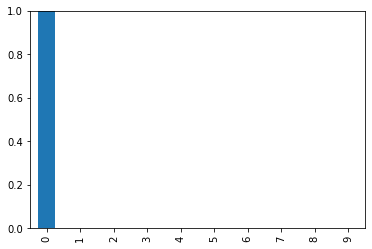

In [58]:
output = C_LR.forward(test_image)

pd.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))
plt.show()

In [59]:
def get_acc(score=0, items=0):
    for label, image_data_tensor, target_tensor in test_mnist_dataset:
        answer = C_LR.forward(image_data_tensor).detach().numpy()
        if (answer.argmax() == label):
            score += 1
            pass
        items += 1

    print(score, items, score/items)

get_acc()

9753 10000 0.9753
